# **Iris Classification ANN with PyTorch** 🌸
Following tutorials and guidance by Pierian Data's "PyTorch for Deep Learning Bootcamp" on Udemy to build a basic classification ANN in PyTorch, working with the iris dataset using Python OOP.

In [7]:
# import packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# machine learning packages
from sklearn.model_selection import train_test_split

# deep learning packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# settings
torch.set_printoptions(edgeitems=2)

In [8]:
class Model(nn.Module):

  def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
    # how many layers?
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [9]:
torch.manual_seed(32)
model = Model()

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/aaronhowellai/machine-learning-projects/main/datasets/iris.csv')

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


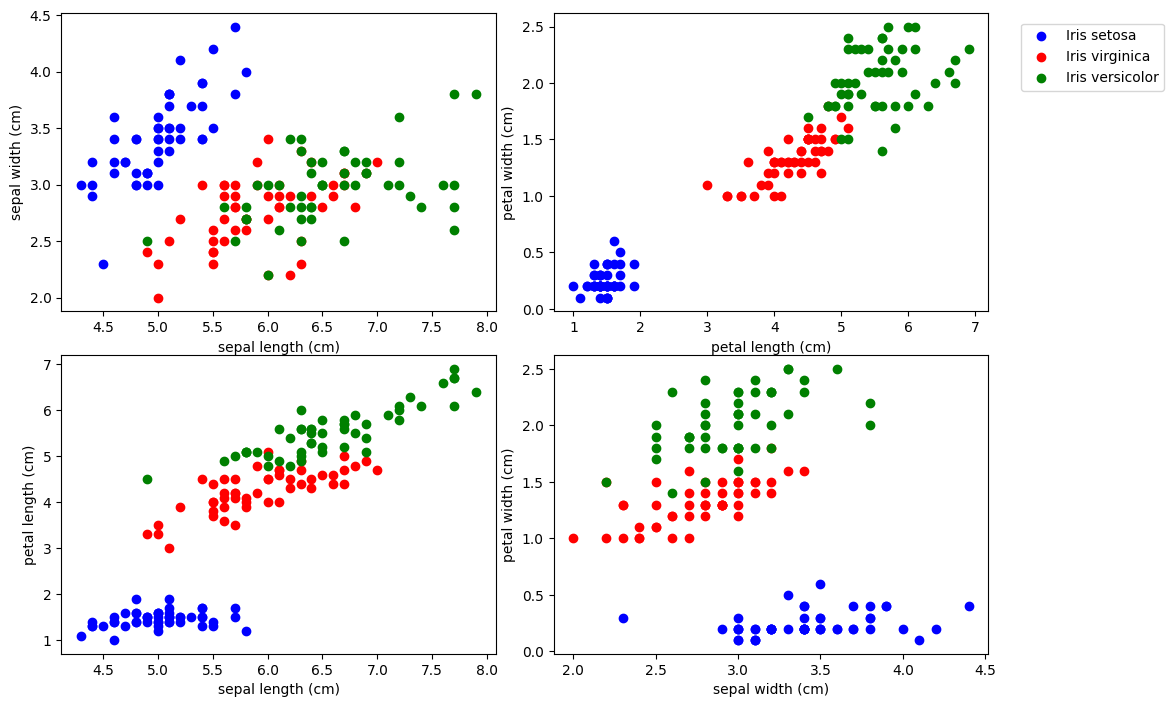

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

* **Iris Setosa** will be the easiest to classify out of the 3 species.

# **Perform train-test-split** with Scikit-Learn

In [14]:
X = df.drop('target',axis=1)
y = df['target']

# convert to numpy arrays
X = X.values
y = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=33)

## **Convert to FloatTensors**

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
y_train = torch.LongTensor(y_train)

In [18]:
y_test = torch.LongTensor(y_test)

In [19]:
# criteria for measuring error (cross entropy is good for multi-class classification)
criterion = nn.CrossEntropyLoss()

# model.parameters is a generator object
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) # efficient

In [20]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


# **Setting Epochs**
* 1 Epoch = 1 run through the training data

In [21]:
epochs = 200
losses = []

for i in range(epochs):

  # run nn foward and get a prediction
  y_pred = model.forward(X_train)

  # calculate the loss/error
  loss = criterion(y_pred, y_train) # no one hot encoding

  # build loss list
  losses.append(loss)

  if i%10==0:
    print(f'Epoch {i}, loss is: {loss}')

  # backpropapgation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, loss is: 1.1507114171981812
Epoch 10, loss is: 0.9377315044403076
Epoch 20, loss is: 0.7798256278038025
Epoch 30, loss is: 0.6099401712417603
Epoch 40, loss is: 0.40079930424690247
Epoch 50, loss is: 0.25436317920684814
Epoch 60, loss is: 0.15053048729896545
Epoch 70, loss is: 0.10086944699287415
Epoch 80, loss is: 0.08128313720226288
Epoch 90, loss is: 0.07231426984071732
Epoch 100, loss is: 0.06713332235813141
Epoch 110, loss is: 0.06355974078178406
Epoch 120, loss is: 0.06085381284356117
Epoch 130, loss is: 0.05870988219976425
Epoch 140, loss is: 0.05695848539471626
Epoch 150, loss is: 0.055492304265499115
Epoch 160, loss is: 0.05423795431852341
Epoch 170, loss is: 0.053144700825214386
Epoch 180, loss is: 0.05217757076025009
Epoch 190, loss is: 0.05131226405501366


# **Gradient Descent**
See if the number of Epochs produced an accurate enough result

In [22]:
# convert losses to a numpy array
np_losses = [loss.detach().cpu().numpy() for loss in losses]

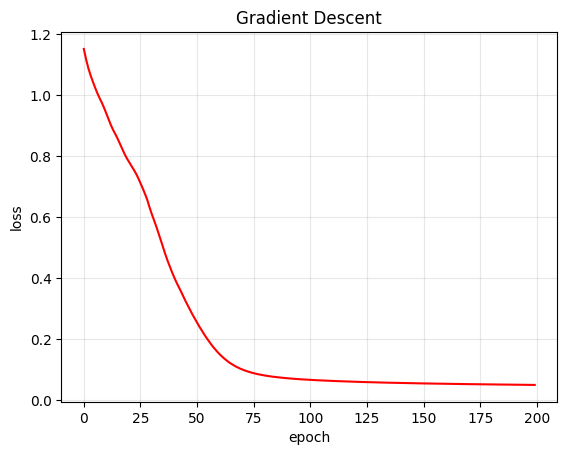

In [23]:
plt.plot(range(epochs),np_losses,'r-')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Gradient Descent')
plt.grid(alpha=.3)
plt.show()

# **Evaluate Model's Performance on Test Set**

In [24]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.0440)

In [25]:
correct = 0

with torch.no_grad():

  for i,data in enumerate(X_test):

    y_val = model.forward(data)

    print(f'{i+1}.)    {str(y_val)}    {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} are correct!')

1.)    tensor([-2.8205,  6.4803, -1.0145])    1
2.)    tensor([-2.4630,  7.1412, -1.8081])    1
3.)    tensor([  7.9814,   1.1886, -12.2241])    0
4.)    tensor([-4.8562,  6.3026,  1.3067])    1
5.)    tensor([-9.3934,  4.2225,  7.4338])    2
6.)    tensor([-13.4211,   1.8034,  12.8417])    2
7.)    tensor([  7.8054,   1.4258, -12.1862])    0
8.)    tensor([  8.7649,   1.0591, -13.1944])    0
9.)    tensor([-9.3691,  4.2262,  7.3250])    2
10.)    tensor([-12.0320,   3.1541,  10.7873])    2
11.)    tensor([-12.5736,   2.8315,  11.5023])    2
12.)    tensor([  7.9732,   0.9370, -11.9811])    0
13.)    tensor([-11.9959,   2.5438,  11.0149])    2
14.)    tensor([-4.8925,  6.0516,  1.4775])    1
15.)    tensor([-9.9068,  3.9488,  8.0440])    2
16.)    tensor([-2.4449,  6.9555, -1.6940])    1
17.)    tensor([-7.3145,  4.6211,  4.8814])    2
18.)    tensor([  8.9339,   1.0852, -13.4533])    0
19.)    tensor([-4.5849,  6.2573,  0.9688])    1
20.)    tensor([-10.1447,   4.6992,   7.8929])    2

# **Save Trained Model to a File**

In [26]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [27]:
torch.save(model,'my_iris_model.pkl')

In [28]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# **Classify on Unseen Data**

In [29]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

## **Plot the new species data point**

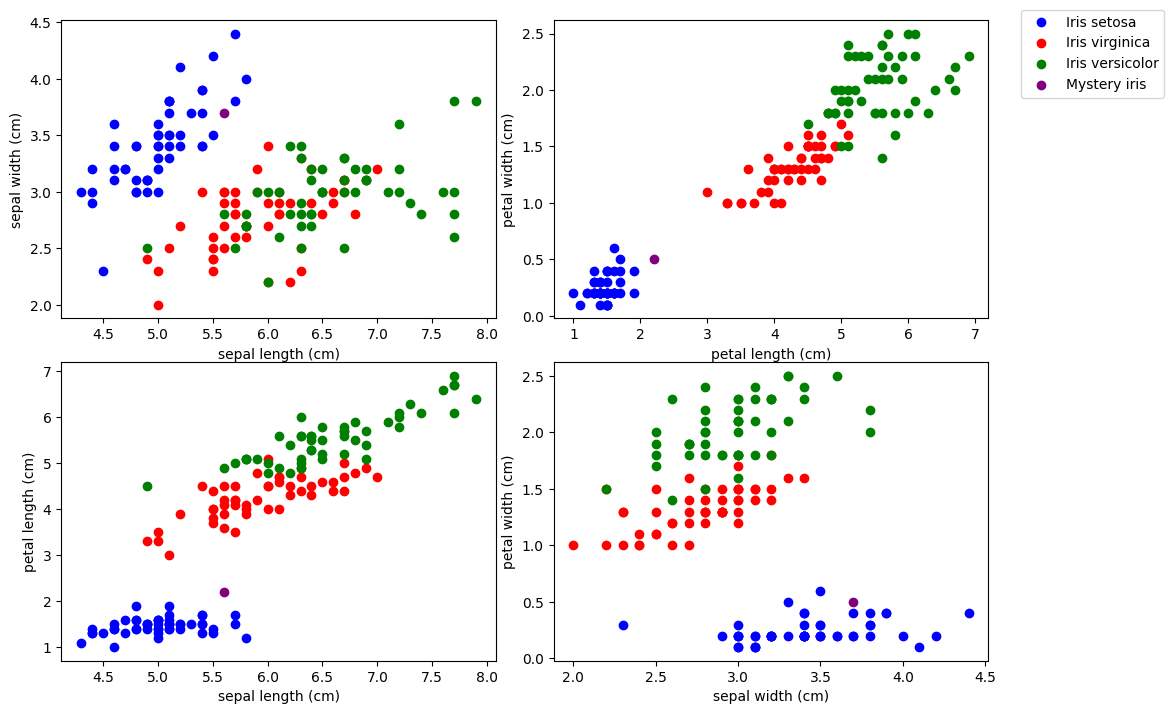

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g', 'p']
labels = ['Iris setosa','Iris virginica','Iris versicolor', 'Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='purple')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## **Make The Classification**

In [31]:
with torch.no_grad():
  print('Prediction is at index:',new_model(mystery_iris).argmax())

Prediction is at index: tensor(0)
